# **Econometric Analysis**

In [25]:
# 📊 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [26]:
# 🛠️ Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [27]:
# 🖥️ Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [28]:
# 📚 Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor 

# 📏 Set figure size for visualizations
plt.rcParams['figure.figsize'] = (14, 7)

In [29]:
# 📂 Set the local path for loading the dataset
file_path = '../data/BrentOilPrices.csv'
print("📥 Loading data from:", file_path)

📥 Loading data from: ../data/BrentOilPrices.csv


In [43]:
oil_price_data= pd.read_csv(file_path)
print(oil_price_data.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [45]:
oil_price_data['Date'] = pd.to_datetime(oil_price_data['Date'], format='mixed')
print(oil_price_data.head())

        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [32]:
oil_price_data.set_index('Date', inplace=True)

In [33]:
# 📌 Install wbdata if not installed
# !pip install wbdata pandas

# 📌 Import necessary libraries
import wbdata
import pandas as pd

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [34]:
# 📌 Function to fetch data from the World Bank
def fetch_data(indicator_code, indicator_name, country='WLD', start_date=None, end_date=None):
    """Fetches data from World Bank Data for a specified indicator."""
    print(f"🌍 Fetching data for {indicator_name} ({indicator_code}) from {start_date} to {end_date}...")
    data = wbdata.get_dataframe({indicator_code: indicator_name}, country=country, date=(start_date, end_date))
    print(f"✅ Data fetched for {indicator_name}!")
    return data

# 📌 Function to clean data
def clean_data(df):
    """Cleans the DataFrame by resetting index, renaming columns, and handling missing values."""
    print("🧹 Cleaning data...")
    if df is not None and not df.empty:
        df.reset_index(inplace=True)
        df.columns = ['date', df.columns[1]]  # Keep the first column as 'date', second as the indicator name
        df.dropna(inplace=True)
        df['date'] = pd.to_datetime(df['date'])
        print("✅ Data cleaned!")
        return df
    print("⚠️ No data available after cleaning!")
    return pd.DataFrame()  # Return an empty DataFrame if input is None or empty

# 📌 Function to convert data to daily frequency
def convert_to_daily(df):
    """Converts a DataFrame with dates to a daily frequency using interpolation."""
    print("📅 Converting data to daily frequency...")
    if df.empty:
        print("⚠️ No data to convert!")
        return df
    full_index = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    df_daily = df.set_index('date').reindex(full_index)
    df_daily.interpolate(method='time', inplace=True)  # Interpolate to fill missing values
    df_daily.reset_index(inplace=True)
    df_daily.rename(columns={'index': 'Date'}, inplace=True)
    print("✅ Data converted to daily frequency!")
    return df_daily


In [35]:
# 📌 Set the indicator codes
gdp_indicator = 'NY.GDP.MKTP.CD'                # GDP (current US$)
cpi_indicator = 'FP.CPI.TOTL.ZG'                # Inflation (CPI)
unemployment_indicator = 'SL.UEM.TOTL.ZS'       # Unemployment rate (% of total labor force)
exchange_rate_indicator = 'PA.NUS.FCRF'         # Exchange rate, USD to other currencies

# 📌 Define the date range
start_date = '1987-05-20'
end_date = '2022-11-14'

print("🔧 Parameters set successfully!")


🔧 Parameters set successfully!


In [36]:
# 📌 Fetch and clean data for each indicator
gdp_data = clean_data(fetch_data(gdp_indicator, 'GDP', country='WLD', start_date=start_date, end_date=end_date))
cpi_data = clean_data(fetch_data(cpi_indicator, 'CPI', country='WLD', start_date=start_date, end_date=end_date))
unemployment_data = clean_data(fetch_data(unemployment_indicator, 'Unemployment Rate', country='WLD', start_date=start_date, end_date=end_date))
exchange_rate_data = clean_data(fetch_data(exchange_rate_indicator, 'Exchange Rate', country='EMU', start_date=start_date, end_date=end_date))

print("✅ Data fetched and cleaned for all indicators!")


🌍 Fetching data for GDP (NY.GDP.MKTP.CD) from 1987-05-20 to 2022-11-14...
✅ Data fetched for GDP!
🧹 Cleaning data...
✅ Data cleaned!
🌍 Fetching data for CPI (FP.CPI.TOTL.ZG) from 1987-05-20 to 2022-11-14...
✅ Data fetched for CPI!
🧹 Cleaning data...
✅ Data cleaned!
🌍 Fetching data for Unemployment Rate (SL.UEM.TOTL.ZS) from 1987-05-20 to 2022-11-14...
✅ Data fetched for Unemployment Rate!
🧹 Cleaning data...
✅ Data cleaned!
🌍 Fetching data for Exchange Rate (PA.NUS.FCRF) from 1987-05-20 to 2022-11-14...
✅ Data fetched for Exchange Rate!
🧹 Cleaning data...
✅ Data cleaned!
✅ Data fetched and cleaned for all indicators!


In [37]:
# 📌 Convert to daily frequency
gdp_data_daily = convert_to_daily(gdp_data)
cpi_data_daily = convert_to_daily(cpi_data)
unemployment_data_daily = convert_to_daily(unemployment_data)
exchange_rate_data_daily = convert_to_daily(exchange_rate_data)

print("📆 Daily frequency conversion complete!")


📅 Converting data to daily frequency...
✅ Data converted to daily frequency!
📅 Converting data to daily frequency...
✅ Data converted to daily frequency!
📅 Converting data to daily frequency...
✅ Data converted to daily frequency!
📅 Converting data to daily frequency...
✅ Data converted to daily frequency!
📆 Daily frequency conversion complete!


In [38]:
# 📌 Save each cleaned DataFrame to a CSV file
output_dir = "../data/"
print(f"💾 Saving data to {output_dir}...")

gdp_data_daily.to_csv(output_dir + "GDP_cleaned_data_daily.csv", index=False)
cpi_data_daily.to_csv(output_dir + "CPI_cleaned_data_daily.csv", index=False)
unemployment_data_daily.to_csv(output_dir + "Unemployment_Rate_cleaned_data_daily.csv", index=False)
exchange_rate_data_daily.to_csv(output_dir + "Exchange_Rate_cleaned_data_daily.csv", index=False)

print("✅ All files saved successfully! 🎉")


💾 Saving data to ../data/...
✅ All files saved successfully! 🎉


📊 Correlation between GDP and oil prices: 0.7563009785972020


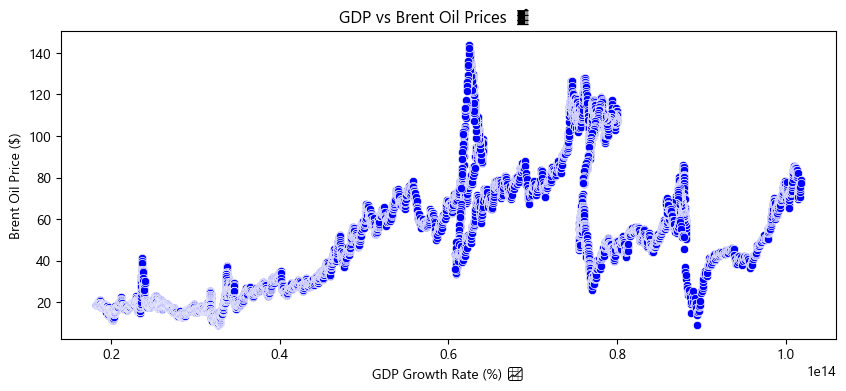

📊 Correlation between CPI and oil prices: -0.4095557412930654


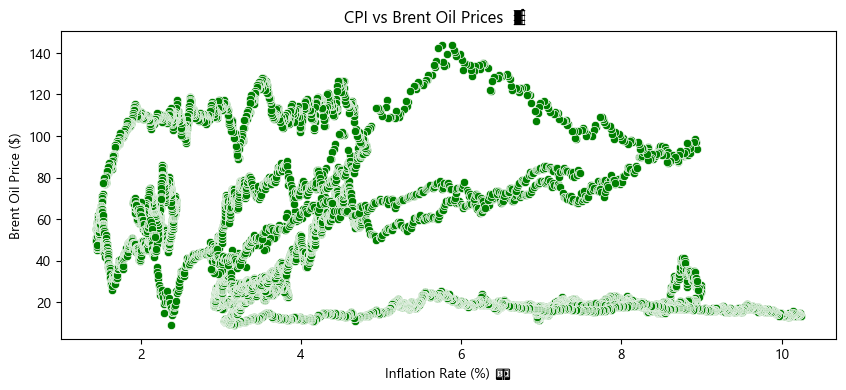

📊 Correlation between Unemployment Rate and oil prices: 0.0446983999376375


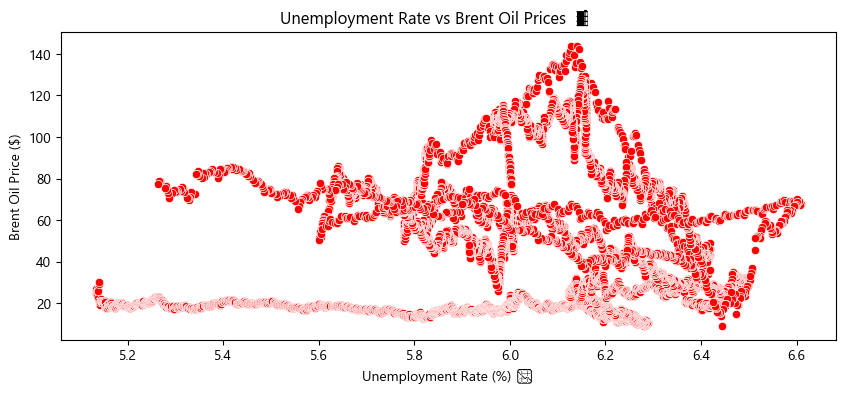

📊 Correlation between Exchange Rate and oil prices: -0.6736337150209103


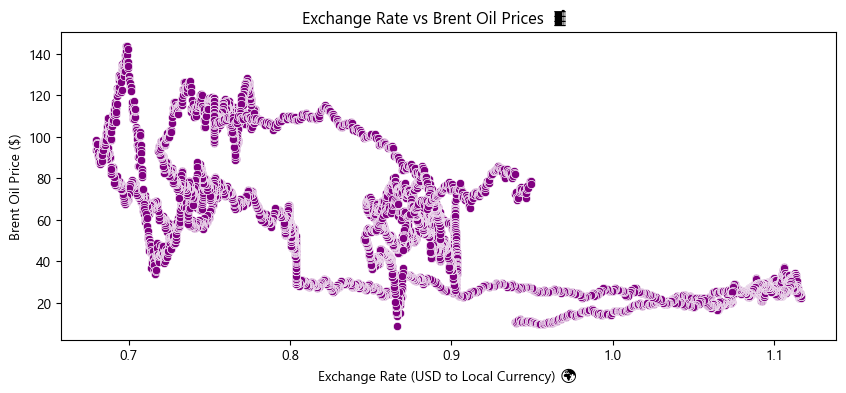

In [39]:
def analyze_indicators(gdp_data, inflation_data, unemployment_data, exchange_rate_data, oil_data):
    """
    Analyzes the correlation between economic indicators and oil prices,
    and generates scatter plots for each indicator.
    """

    # Set a font that supports emojis
    plt.rcParams['font.family'] = 'Segoe UI Emoji'  # Ensure this font is available on your system

    def analyze_and_plot(indicator_data, indicator_name, oil_data, x_label, color):
        merged_data = pd.merge(indicator_data, oil_data.reset_index(), on='Date')
        merged_data.dropna(inplace=True)
        
        correlation = merged_data[indicator_name].corr(merged_data['Price'])
        print(f"📊 Correlation between {indicator_name} and oil prices: {correlation:.16f}")

        plt.figure(figsize=(10, 4))
        sns.scatterplot(data=merged_data, x=indicator_name, y='Price', color=color)  # Set the color
        plt.title(f'{indicator_name} vs Brent Oil Prices 🛢️')
        plt.xlabel(x_label)
        plt.ylabel('Brent Oil Price ($)')
        plt.show()

    # Define colors for each indicator
    gdp_color = 'blue'  # Change this to your preferred color
    cpi_color = 'green'
    unemployment_color = 'red'
    exchange_rate_color = 'purple'

    analyze_and_plot(gdp_data, 'GDP', oil_data, 'GDP Growth Rate (%) 📈', gdp_color)
    analyze_and_plot(inflation_data, 'CPI', oil_data, 'Inflation Rate (%) 💵', cpi_color)
    analyze_and_plot(unemployment_data, 'Unemployment Rate', oil_data, 'Unemployment Rate (%) 📉', unemployment_color)
    analyze_and_plot(exchange_rate_data, 'Exchange Rate', oil_data, 'Exchange Rate (USD to Local Currency) 🌍', exchange_rate_color)

# Example of calling the function
analyze_indicators(gdp_data_daily, cpi_data_daily, unemployment_data_daily, exchange_rate_data_daily, oil_price_data)

In [46]:
print("GDP Data Date Range:", gdp_data_daily['Date'].min(), "to", gdp_data_daily['Date'].max())
print("Exchange Rate Data Date Range:", exchange_rate_data_daily['Date'].min(), "to", exchange_rate_data_daily['Date'].max())
print("Oil Price Data Date Range:", oil_price_data['Date'].min(), "to", oil_price_data['Date'].max())

GDP Data Date Range: 1987-01-01 00:00:00 to 2022-01-01 00:00:00
Exchange Rate Data Date Range: 1999-01-01 00:00:00 to 2022-01-01 00:00:00
Oil Price Data Date Range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


In [47]:
# Merge all datasets on 'Date' column
merged_data = gdp_data_daily.merge(
    exchange_rate_data_daily, on="Date", how="outer"
).merge(oil_price_data.reset_index(), on="Date", how="outer")

# Fill missing values with forward fill for consistency if there are any gaps
merged_data.ffill(inplace=True)

# Print the shape of the merged dataset
print(
    f"📊 Merged data shape: {merged_data.shape[0]} rows, {merged_data.shape[1]} columns"
)

# Save to csv file
merged_data.to_csv("../data/features.csv", index=False)
print("✅ Merged data saved to '../data/features.csv'")

📊 Merged data shape: 13005 rows, 5 columns
✅ Merged data saved to '../data/features.csv'
